In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [47]:
# Count of collected posts per tag - histogram

search_date="2024-07-15"
folder_path = Path(search_date)

file_names = [f.name for f in folder_path.iterdir() if f.is_file() and f.name != 'Communities.csv']

tag = []
posts = []

for file in file_names:
    tag.append(file.replace("_"," ").replace(".csv",""))
    posts.append(pd.read_csv(f'{search_date}/{file}').shape[0])

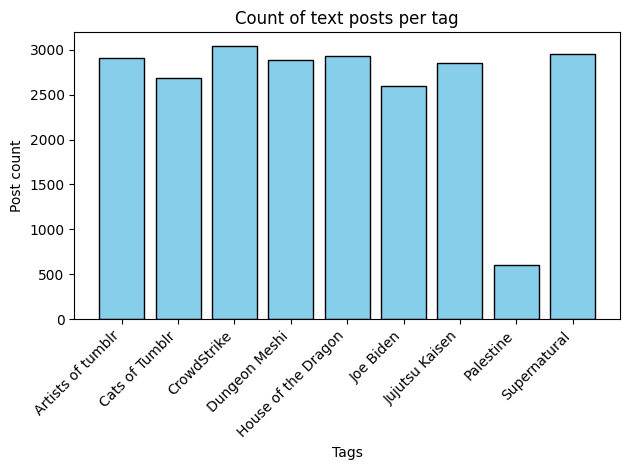

In [49]:
plt.bar(tag, posts, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Tags')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Post count')
plt.title('Count of text posts per tag')
plt.tight_layout()
plt.show()

In [53]:
# total count of posts
sum(posts)

23457

In [63]:
communities_df = pd.read_csv(f'{search_date}/Communities.csv')
grouped = communities_df.groupby('tag')

In [87]:
group_size = grouped.size()
print(group_size)

tag
Artists of tumblr     96
Cats of Tumblr       461
CrowdStrike           18
Dungeon Meshi        919
Joe Biden            452
Jujutsu Kaisen       611
Palestine            176
Supernatural         883
dtype: int64


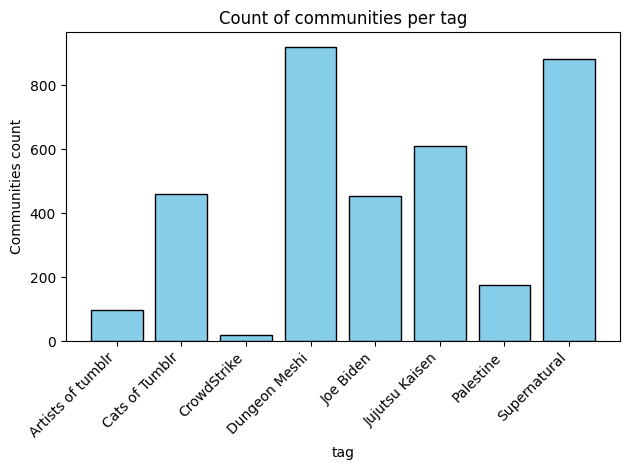

In [85]:
# Count of communities per tag - bar plot

plt.bar(group_size.index, group_size.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('tag')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Communities count')
plt.title('Count of communities per tag')
plt.tight_layout()
plt.show()

                   tag  blog_count  frequency
0    Artists of tumblr           2          1
1    Artists of tumblr           4          2
2    Artists of tumblr           5          2
3    Artists of tumblr           6          2
4    Artists of tumblr           7          1
..                 ...         ...        ...
171       Supernatural         137          1
172       Supernatural         165          1
173       Supernatural         209          1
174       Supernatural         264          1
175       Supernatural         266          1

[176 rows x 3 columns]


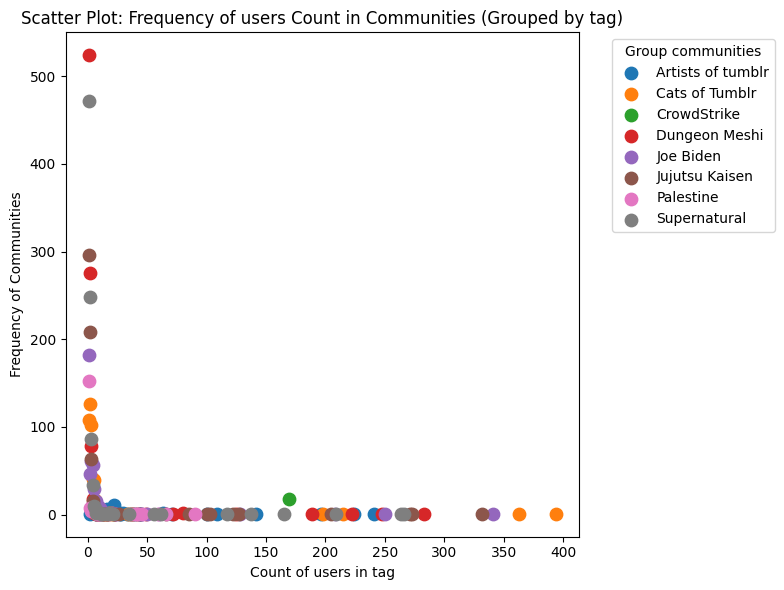

In [275]:
# Count of users in a community per tag - map

communities_df['blog_count'] = communities_df['blog_names'].apply(lambda x: len(x.split(' ')))

grouped_counts = communities_df.groupby(['tag', 'blog_count']).agg(
    frequency=('blog_count', 'size'),
    communities=('community', list)
).reset_index()

print(grouped_freq)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(range(len(grouped_counts['tag'].unique())))
for idx, group in enumerate(grouped_counts['tag'].unique()):
    group_data = grouped_counts[grouped_counts['tag'] == group]
    plt.scatter(group_data['blog_count'], group_data['frequency'], label=group, s=80, color=colors[idx])

plt.xlabel('Count of users in tag')
plt.ylabel('Frequency of Communities')
plt.title('Scatter Plot: Frequency of users Count in Communities (Grouped by tag)')

# Add legend
plt.legend(title='Group communities', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

                  tag  blog_count  frequency  \
0   Artists of tumblr           1         94   
1   Artists of tumblr           9          2   
2      Cats of Tumblr           1        450   
3      Cats of Tumblr           2          4   
4      Cats of Tumblr           3          1   
..                ...         ...        ...   
68       Supernatural          56          1   
69       Supernatural          67          1   
70       Supernatural          89          1   
71       Supernatural          94          1   
72       Supernatural         137          1   

                                          communities  
0   [Community 1, Community 4, Community 5, Commun...  
1                          [Community 2, Community 3]  
2   [Community 6, Community 8, Community 9, Commun...  
3   [Community 11, Community 31, Community 90, Com...  
4                                      [Community 24]  
..                                                ...  
68                             

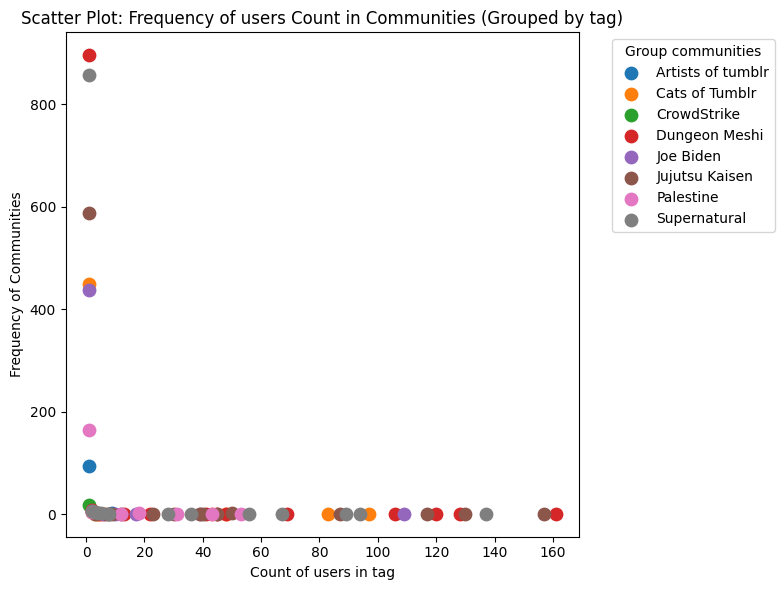

In [283]:
# Count of Unique users in a community per tag - map show majority of bots


communities_df['blog_count'] = communities_df['blog_names'].apply(lambda x: len(set(x.split(' '))))

grouped_unique_counts = communities_df.groupby(['tag','blog_count']).agg(
    frequency=('blog_count', 'size'),
    communities=('community', list)
).reset_index()
print(grouped_unique_counts)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(range(len(grouped_unique_counts['tag'].unique())))
for idx, group in enumerate(grouped_unique_counts['tag'].unique()):
    group_data = grouped_unique_counts[grouped_unique_counts['tag'] == group]
    plt.scatter(group_data['blog_count'], group_data['frequency'], label=group, s=80, color=colors[idx])

plt.xlabel('Count of users in tag')
plt.ylabel('Frequency of Communities')
plt.title('Scatter Plot: Frequency of users Count in Communities (Grouped by tag)')

# Add legend
plt.legend(title='Group communities', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [287]:
# Sort communities and tags per most users
grouped_counts.sort_values(by=['blog_count'], ascending=False).head(10)        

,tag,blog_count,frequency,communities
65,Cats of Tumblr,394,1,[Community 1]
64,Cats of Tumblr,363,1,[Community 2]
112,Joe Biden,341,1,[Community 1]
137,Jujutsu Kaisen,332,1,[Community 1]
86,Dungeon Meshi,283,1,[Community 1]
136,Jujutsu Kaisen,273,1,[Community 2]
135,Jujutsu Kaisen,271,1,[Community 3]
175,Supernatural,266,1,[Community 1]
174,Supernatural,264,1,[Community 2]
111,Joe Biden,250,1,[Community 2]


In [289]:
# Sort communities and tags per most unique users
grouped_unique_counts.sort_values(by=['blog_count'], ascending=False).head(10)

,tag,blog_count,frequency,communities
26,Dungeon Meshi,161,1,[Community 1]
52,Jujutsu Kaisen,157,1,[Community 1]
72,Supernatural,137,1,[Community 2]
51,Jujutsu Kaisen,130,1,[Community 2]
25,Dungeon Meshi,128,1,[Community 3]
24,Dungeon Meshi,120,1,[Community 2]
50,Jujutsu Kaisen,117,1,[Community 3]
34,Joe Biden,109,1,[Community 1]
23,Dungeon Meshi,106,1,[Community 4]
10,Cats of Tumblr,97,1,[Community 1]


In [ ]:
# Word clouds for most communities with most unique users

In [ ]:
# word clouds for biggest community with smallest amount of users